In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from feature_extractor import *
from cluster_events import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import RandomForest as rf
import KNN as knn
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.naive_bayes import GaussianNB
import GaussianNaiveBayes as gnb
import neaural_net as nn
import logisitic_regression as log_reg
import dummy_classifier as dumm
import svm as svm
import EnsembleLearning as el
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
dataPath = './data/'
outputPath = './results/'

In [3]:
events = pd.read_csv(dataPath + 'events.csv')


In [4]:
events = events.iloc[:, 9:-1]

In [6]:
s = events.sum()

In [7]:
events.head

<bound method NDFrame.head of          c_1  c_2  c_3  c_4  c_5  c_6  c_7  c_8  c_9  c_10  ...  c_91  c_92  \
0          2    0    2    0    0    0    0    0    0     0  ...     0     0   
1          2    0    2    0    0    0    0    0    0     0  ...     0     0   
2          0    0    0    0    0    0    0    0    0     0  ...     0     0   
3          1    0    2    1    0    0    0    0    0     0  ...     0     0   
4          1    1    0    0    0    0    0    2    0     0  ...     0     0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
3137967    0    0    0    0    0    3    0    0    0     0  ...     0     0   
3137968    0    0    0    0    0    0    0    0    0     0  ...     0     0   
3137969    0    0    0    0    0    0    0    0    0     0  ...     0     0   
3137970    2    3    8    3    3    0    0    3    1     2  ...     1     1   
3137971    0    0    0    0    0    0    0    0    0     0  ...     0     0   

         c_93  c_94  

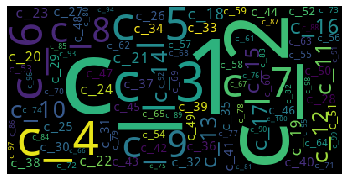

In [8]:
bow = s
wordcloud = WordCloud().generate_from_frequencies(bow)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(outputPath + 'wordcloud.png')

In [9]:
y = s.to_numpy()
# arr
x = events.columns.to_numpy()
print(x)
print(y)

['c_1' 'c_2' 'c_3' 'c_4' 'c_5' 'c_6' 'c_7' 'c_8' 'c_9' 'c_10' 'c_11'
 'c_12' 'c_13' 'c_14' 'c_15' 'c_16' 'c_17' 'c_18' 'c_19' 'c_20' 'c_21'
 'c_22' 'c_23' 'c_24' 'c_25' 'c_26' 'c_27' 'c_28' 'c_29' 'c_30' 'c_31'
 'c_32' 'c_33' 'c_34' 'c_35' 'c_36' 'c_37' 'c_38' 'c_39' 'c_40' 'c_41'
 'c_42' 'c_43' 'c_44' 'c_45' 'c_46' 'c_47' 'c_48' 'c_49' 'c_50' 'c_51'
 'c_52' 'c_53' 'c_54' 'c_55' 'c_56' 'c_57' 'c_58' 'c_59' 'c_60' 'c_61'
 'c_62' 'c_63' 'c_64' 'c_65' 'c_66' 'c_67' 'c_68' 'c_69' 'c_70' 'c_71'
 'c_72' 'c_73' 'c_74' 'c_75' 'c_76' 'c_77' 'c_78' 'c_79' 'c_80' 'c_81'
 'c_82' 'c_83' 'c_84' 'c_85' 'c_86' 'c_87' 'c_88' 'c_89' 'c_90' 'c_91'
 'c_92' 'c_93' 'c_94' 'c_95' 'c_96' 'c_97' 'c_98' 'c_99' 'c_100']
[7295265 5312437 4556323 3360911 3299885 3118456 2647285 2071713 2222708
 1937772 1771852 1724830 1597050 1591161 1314098 1421307 1301149 1220376
 1091978 1006170 1126811  922410  878864  880561  807250  778548  776122
  766675  563104  723000  708487  592254  712636  697868  617628  682391
  645

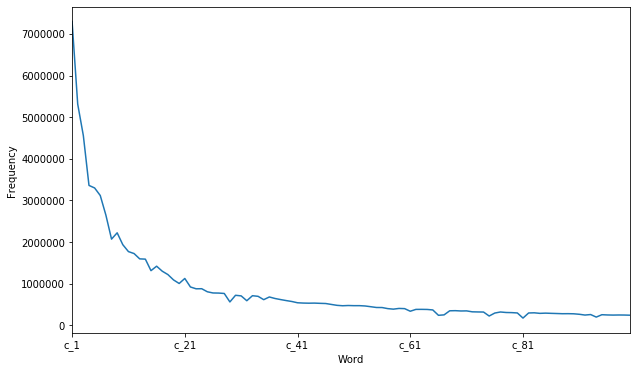

In [24]:
plt.figure(figsize = (10, 6))
plt.xlabel("Word")
plt.ylabel("Frequency")
# data = pd.DataFrame(data={'Word': x, 'Frequency': y})

# # Create lmplot
# lm = sns.lmplot('Word', 'Frequency', data, size=7, truncate=True, scatter_kws={"s": 100})

# # Access the Figure
# fig = lm.fig 

# # Add a title to the Figure
# fig.suptitle('this is the figure title', fontsize=12)

# # Show the plot
# plt.show()
# sns.regplot(x = x, y = y)
s.plot()
plt.savefig(outputPath + 'wordDistribution.png')

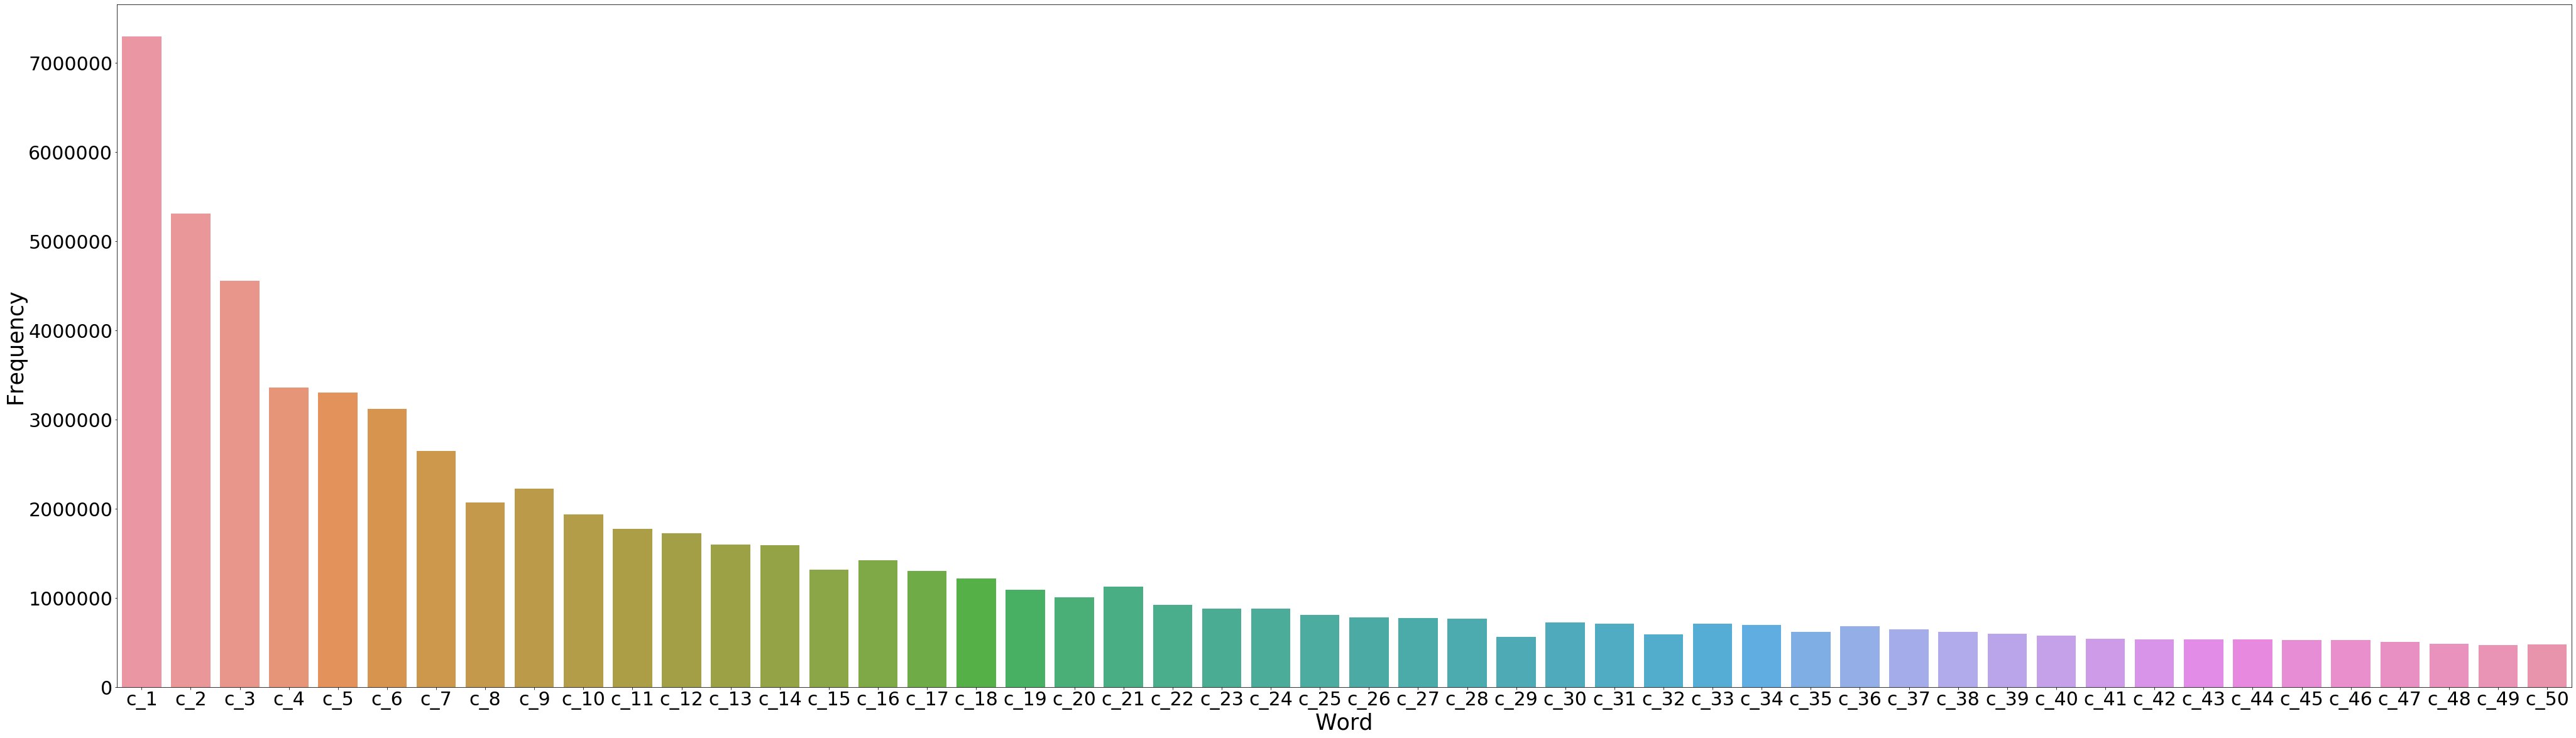

In [39]:
plt.figure(figsize=(70, 20))
plt.xlabel('Word', fontsize=35)
plt.ylabel('Frequency', fontsize=35)
sns.barplot(x = x[:50], y = y[:50])
# plt.show()
plt.tick_params(labelsize=30)
plt.savefig(outputPath + 'wordBarPlot.png')

In [19]:
events.head

<bound method NDFrame.head of          c_1  c_2  c_3  c_4  c_5  c_6  c_7  c_8  c_9  c_10  ...  c_91  c_92  \
0          2    0    2    0    0    0    0    0    0     0  ...     0     0   
1          2    0    2    0    0    0    0    0    0     0  ...     0     0   
2          0    0    0    0    0    0    0    0    0     0  ...     0     0   
3          1    0    2    1    0    0    0    0    0     0  ...     0     0   
4          1    1    0    0    0    0    0    2    0     0  ...     0     0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
3137967    0    0    0    0    0    3    0    0    0     0  ...     0     0   
3137968    0    0    0    0    0    0    0    0    0     0  ...     0     0   
3137969    0    0    0    0    0    0    0    0    0     0  ...     0     0   
3137970    2    3    8    3    3    0    0    3    1     2  ...     1     1   
3137971    0    0    0    0    0    0    0    0    0     0  ...     0     0   

         c_93  c_94  